In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv, DataFrame, Series

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all = pd.concat([train, test])
ids = test.iloc[:,0]

In [3]:
all.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 107.4+ KB


Text(0.5, 1, 'Missing values heatmap')

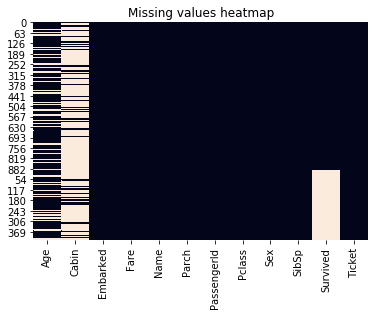

In [5]:
all.isnull().sum()
sns.heatmap(all.isnull(), cbar = False).set_title("Missing values heatmap")

In [6]:
train.drop(['Cabin', 'PassengerId'], axis = 1, inplace=True)
test.drop(['Cabin', 'PassengerId'], axis = 1, inplace=True)

In [7]:
for dataset in [train, test]:
    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))

Text(0.5, 1, 'Missing values heatmap')

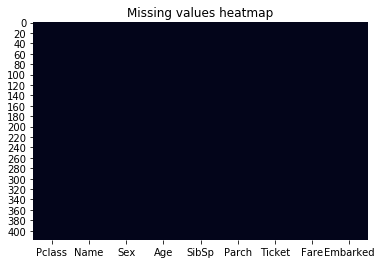

In [8]:
test.isnull().sum()
sns.heatmap(test.isnull(), cbar = False).set_title("Missing values heatmap")

In [9]:
train.describe(include = ['object'])

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Hassan, Mr. Houssein G N",male,347082,S
freq,1,577,7,644


In [10]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
train['Family'] = train.Parch + train.SibSp + 1
test['Family'] = train.Parch + train.SibSp + 1
for dataset in [train, test]:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family'] == 1, 'Alone'] = 1

In [12]:
for dataset in [train, test]:
	dataset['Sex'] = dataset['Sex'].map({'male':1, 'female':0})

In [13]:
train.drop(['Parch', 'SibSp', 'Family'], axis = 1, inplace=True)
test.drop(['Parch', 'SibSp', 'Family'], axis = 1, inplace=True)

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
for dataset in [train,test]:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')

In [16]:
train['Fare_Category'] = pd.cut(train['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])
test['Fare_Category'] = pd.cut(train['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

In [17]:
train['Fare_Category'].value_counts()

High_Mid    236
Mid         217
Low         208
High        177
Name: Fare_Category, dtype: int64

In [18]:
for dataset in [train,test]:
    dataset['Fare_Category'] = dataset['Fare_Category'].fillna('High_Mid')
for dataset in [train,test]:
    dataset['Fare_Category'] = dataset['Fare_Category'].map({'Low': 0, 'Mid': 1, 'High_Mid': 2, 'High': 3}).astype('int')

In [19]:
train.drop(['Fare', 'Ticket'], axis = 1, inplace=True)
test.drop(['Fare', 'Ticket'], axis = 1, inplace=True)

In [20]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,Embarked,Alone,Fare_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,1,1


In [21]:
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [22]:
train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Countess      1
Don           1
Ms            1
Mme           1
Sir           1
Jonkheer      1
Capt          1
Name: title, dtype: int64

In [24]:
for dataset in [train,test]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [25]:
train[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [26]:
train['title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: title, dtype: int64

In [27]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].fillna('Mr')
for dataset in [train, test]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype('int')

In [28]:
train.drop(['Name'], axis = 1, inplace=True)
test.drop(['Name'], axis = 1, inplace=True)

In [29]:
train.head(5)

,Survived,Pclass,Sex,Age,Embarked,Alone,Fare_Category,title
0,0,3,1,22.0,0,0,0,1
1,1,1,0,38.0,1,0,3,3
2,1,3,0,26.0,0,1,1,2
3,1,1,0,35.0,0,0,3,3
4,0,3,1,35.0,0,1,1,1


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
y = train['Survived']
X = train.drop(columns=['Survived'])
X_test = test

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [33]:
print('Тренировочная выборка:', X_train.shape)
print('Валидационная выборка:', X_val.shape)

Тренировочная выборка: (712, 7)
Валидационная выборка: (179, 7)


In [34]:
q = LogisticRegression()
q.fit(X_train, y_train)

pred = q.predict(X_val)
accuracy_score(y_val, pred)

0.8100558659217877

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
w = DecisionTreeClassifier()
w.fit(X_train, y_train)

pred = w.predict(X_val)
accuracy_score(y_val, pred)

0.8156424581005587

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
ww = RandomForestClassifier()
ww.fit(X_train, y_train)

pred = ww.predict(X_val)
accuracy_score(y_val, pred)

0.8100558659217877

In [39]:
y = train.Survived

In [40]:
w = DecisionTreeClassifier()
w.fit(X, y)

pred = w.predict(test)

In [41]:
result = w.predict(test)

In [42]:
frame = pd.DataFrame(result) 
frame.columns = ['Survived']
frame.insert(frame.shape[1]-1, 'PassengerID', ids)

frame.to_csv('pred.csv',index=False)